<a href="https://colab.research.google.com/github/celiahc823/machinelearning-az/blob/master/Clustering_Antarctic_Penguin_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# dataset de pingüinos
ruta_csv = "/content/drive/MyDrive/penguins.csv"  # Asegúrate de poner la ruta correcta
penguins_df = pd.read_csv(ruta_csv)

# revisar dataset
print(penguins_df.info())
print(penguins_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


In [ ]:
# Columnas numéricas para el clustering
columnas_numericas = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_numerico = penguins_df[columnas_numericas]


In [ ]:
# Normalizar los datos para que tengan la misma escala
escalador = StandardScaler()
penguins_escalado = escalador.fit_transform(penguins_numerico)


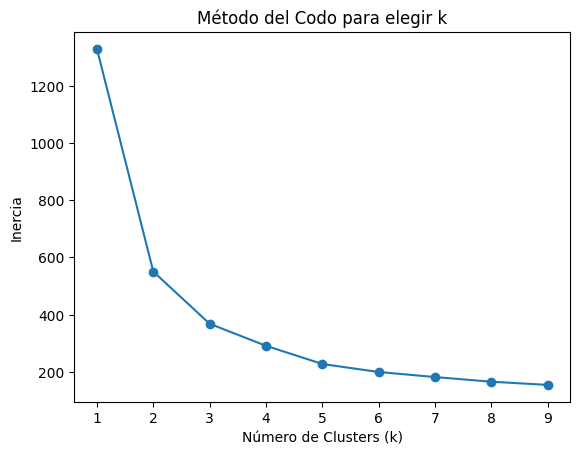

In [ ]:
# Probar diferentes valores de "k" para encontrar el número óptimo de clusters usando el codito
inercias = []
valores_k = range(1, 10)

for k in valores_k:
    modelo_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    modelo_kmeans.fit(penguins_escalado)
    inercias.append(modelo_kmeans.inertia_)  # Guardamos la inercia para cada k

# Graficar la inercia para visualizar el "codo"
plt.plot(valores_k, inercias, '-o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir k')
plt.show()


In [ ]:
# Aplicar KMeans con k=3
modelo_kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
penguins_df['cluster'] = modelo_kmeans.fit_predict(penguins_escalado)


In [ ]:
#Crear el DataFrame
stat_penguins = penguins_df.groupby('cluster')[columnas_numericas].mean()

# Mostrar el DataFrame
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               47.662353        18.748235         196.917647  3898.235294
1               47.568067        14.996639         217.235294  5092.436975
2               38.305469        18.098437         188.554688  3587.500000
